In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_pickle("./data/tlx_final_total_score_2.pkl")
columns = df.columns.tolist()
new_columns = ["cond", "phone"]
mean = []
std = []
for c in columns[2:]:
    if "mean" in c:
        mean.append(c)
    else:
        std.append(c)
        
new_columns = new_columns + mean + std
df = df[new_columns]
df = df.reindex([2,3,1,0,6,7,5,4])
df_list = df.values.tolist()
df_list_w = df_list[4:]
df_list_s = df_list[:4]

df_dict = {"seated":df_list_s, "walking":df_list_w}
df.head()

,cond,phone,tlx1_mean,tlx2_mean,tlx3_mean,tlx4_mean,tlx5_mean,tlx6_mean,tlx_totalScore_mean,tlx1_std,tlx2_std,tlx3_std,tlx4_std,tlx5_std,tlx6_std,tlx_totalScore_std
2,seated,S3,6.166667,4.750000,7.623333,6.523333,7.730000,6.246667,6.503333,3.099054,1.371532,2.886526,1.185088,2.780054,2.681797,1.703066
3,seated,S4,6.186667,5.290000,7.166667,6.830000,7.143333,4.770000,6.233333,2.252672,1.607389,3.105774,2.167648,0.655312,1.737268,1.321981
1,seated,OPO,5.666667,7.313333,7.710000,7.126667,9.253333,6.063333,7.190000,1.966655,3.235836,2.380315,0.546016,0.994049,0.786914,0.020000
0,seated,N6,7.103333,9.956667,8.436667,8.980000,10.936667,8.833333,9.043333,2.513371,3.792695,1.128819,0.695485,1.096373,1.832112,0.650026
6,walking,S3,6.880000,6.456667,6.896667,8.163333,8.166667,6.500000,7.176667,3.500000,2.908476,2.687124,2.501126,3.623456,4.283783,2.818534


In [3]:
df_w = df[df.cond == "walking"]
df_s = df[df.cond == "seated"]

Saving to: ./figures/TLX_total_scores.pdf


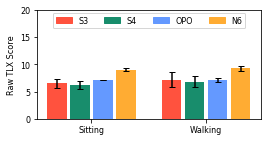

In [4]:
space = 0.3

phones = ["S3","S4","OPO","N6"]
conditions = ['seated','walking']
#print("Phones: %s"% phones)
#colors = ['#202a34','#00adff','#3b6521','#83b5c7','#00fdff','#3bff21','#12b5c7']
#colors = ['#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac']
colors = ['#FF523E','#188D6C','#6499FF','#FFAC33']
tasks = ['TotalScore']
patches = []
for i in range(len(colors)):
    patch = mpatches.Patch(color=colors[i], label=phones[i], )
    patches.append(patch)

    
fig, ax = plt.subplots(1, figsize=(4, 2))

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

patches = []
for i in range(len(colors)):
    patch = mpatches.Patch(color=colors[i], label=phones[i])
    patches.append(patch)
plt.legend(handles= patches, ncol = 4, loc='upper center', bbox_to_anchor = (0.5, 0.975), borderaxespad=0., fontsize=8) 

xticks = []
for y,c in enumerate(conditions):
    dfpoints = np.array(df_dict[c])
    
    xticks.append(float(y) * 1.5 + 0.45)
    
    for i,phone in enumerate(phones):
        vals = dfpoints[i][8:9].astype(np.float)
        errors = dfpoints[i][15:].astype(np.float)

        if c == "seated":
            pos = 0 + i*0.3
            ax.bar(pos, vals, yerr = errors/2, width = space-0.05, label = phones[i],color =colors[i], capsize=3)
        else:
            pos = 1.5 + i * 0.3
            ax.bar(pos, vals, yerr = errors/2, width = space-0.05, label = phones[i],color =colors[i], capsize=3)
    
    ax.set_ylabel("Raw TLX Score", fontsize=8)
    ax.set_aspect('auto')
    ax.set_ylim(0,20)
    ax.set_xticks(xticks)
    ax.set_xticklabels(["Sitting", "Walking"], fontsize=8)
    
filename = "./figures/TLX_total_scores.pdf"
print("Saving to: %s"%filename)
fig.savefig("%s"%filename, bbox_inches="tight")

In [5]:
likert_df = pd.read_csv("./data/Likert_result.csv")

In [6]:
for c in likert_df.columns:
    if "tlx" in c:
        likert_df = likert_df.drop(c,axis=1)

Exporting to: ./figures/likert_questionnaire_seated.pdf
Exporting to: ./figures/likert_questionnaire_walking.pdf


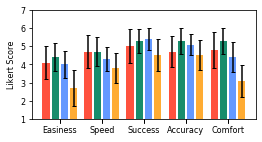

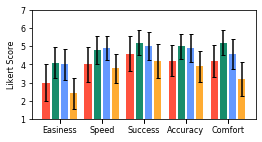

In [7]:
width = 0.22

phones = ["S3","S4","OPO","N6"]
conditions = ['seated',"walking"]
questions = ["question1","question2","question3","question4","question5"]
colors = ['#FF523E','#188D6C','#6499FF','#FFAC33']


fig = []
ax=[]
for i in range(0,2):
    fig1,ax1 = plt.subplots(1, figsize=(4, 2))
    fig.append(fig1)
    ax.append(ax1)

for i,c in enumerate(conditions):
    ax[i].tick_params(axis='both', which='major', labelsize=8)
    ax[i].tick_params(axis='both', which='minor', labelsize=8)
    ticks= []
    for y,p in enumerate(phones):
        for k,q in enumerate(questions):
            pos = y*width + k 
            q_list = likert_df[(likert_df.Phone == p)&(likert_df.Cond == c)][q].values
            if q == "question1":
                q_list = 7 - q_list
                ax[i].bar(pos,q_list.mean().round(1), yerr = q_list.std()/2, width = width-0.05, capsize = 2, color = colors[y])
            else:
                ax[i].bar(pos,q_list.mean().round(1), yerr = q_list.std()/2, width = width-0.05, capsize = 2, color = colors[y])
            ticks.append(float(k)+1.5*width)
    ax[i].set_ylabel("Likert Score", fontsize=8)
    ax[i].set_ylim(1,7)
    ax[i].set_yticks(np.arange(1, 8))
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(["Easiness","Speed","Success","Accuracy","Comfort"], fontsize=8)
    filename = "./figures/likert_questionnaire_%s.pdf"%c
    print("Exporting to: %s"%filename)
    fig[i].savefig(filename, bbox_inches="tight")

